1. Generate $n=100$  two-dimesional training dataset which is linearly separable. Build a **Perceptron Algorithm** that separates the data points and plot the separating lines of last 10 iterations. Also plot the **training error v/s number of iterations.**

Final Training Accuracy: 1.0


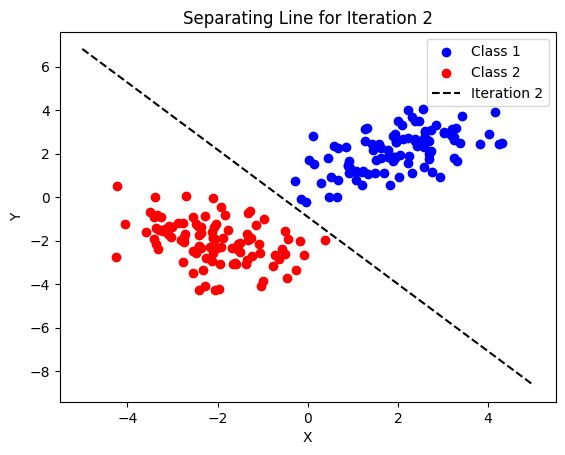

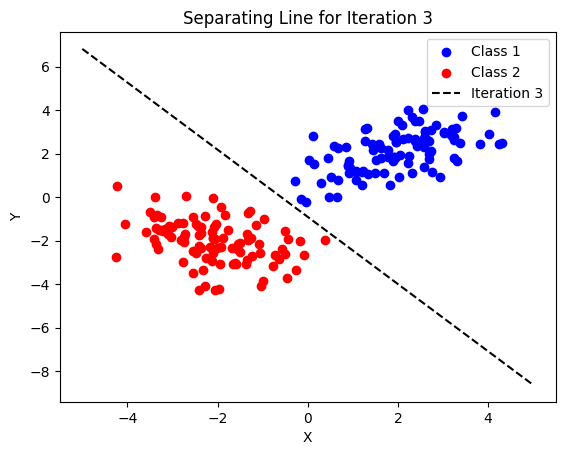

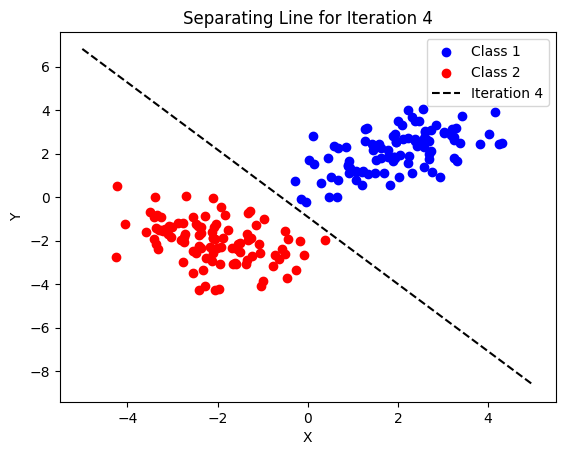

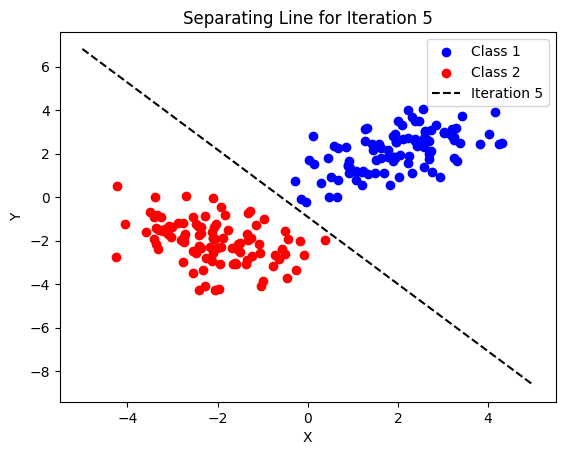

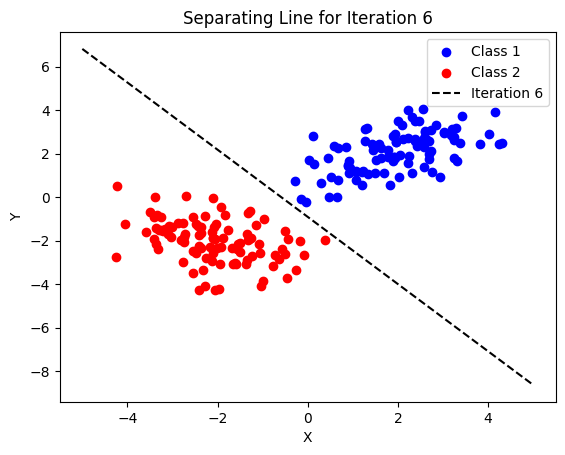

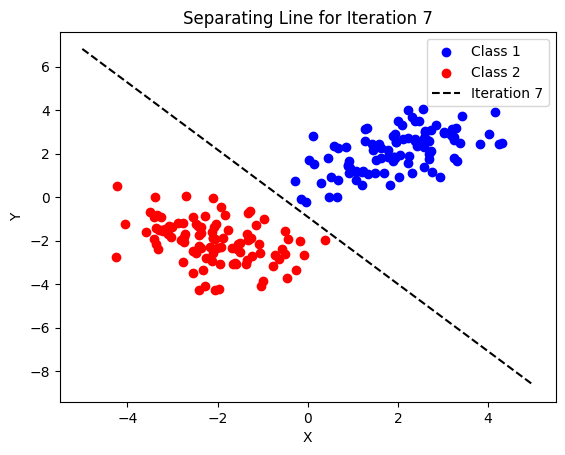

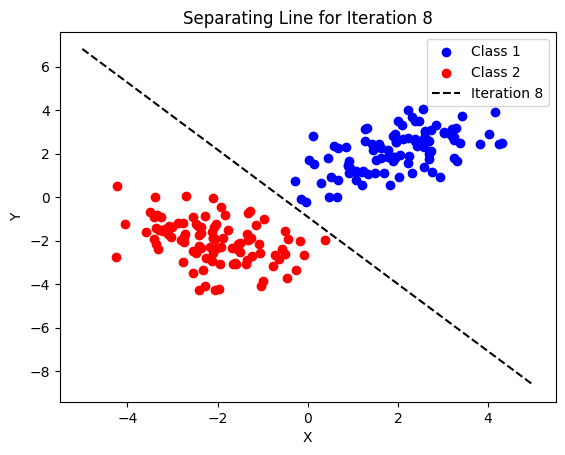

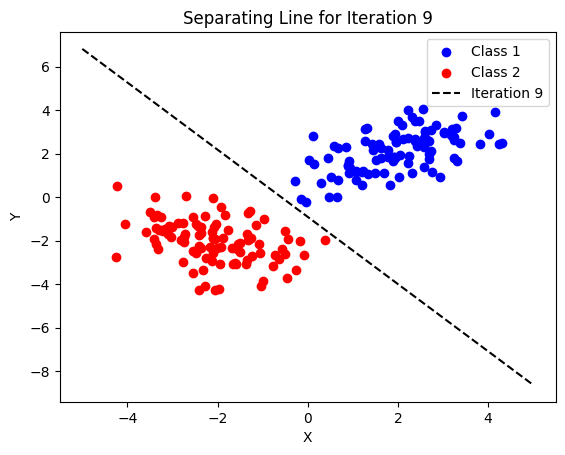

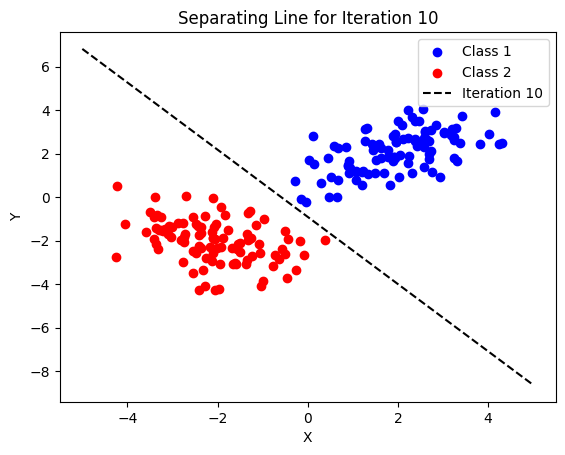

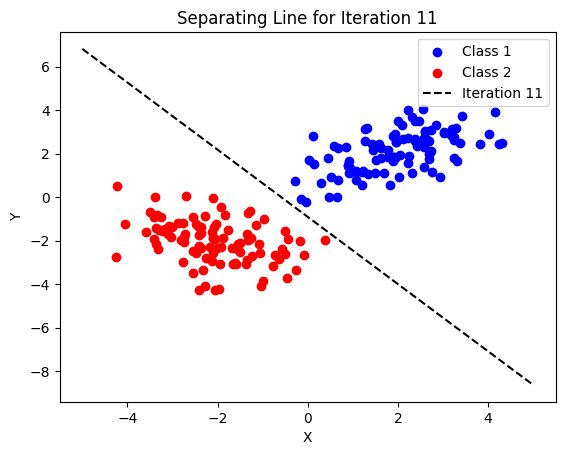

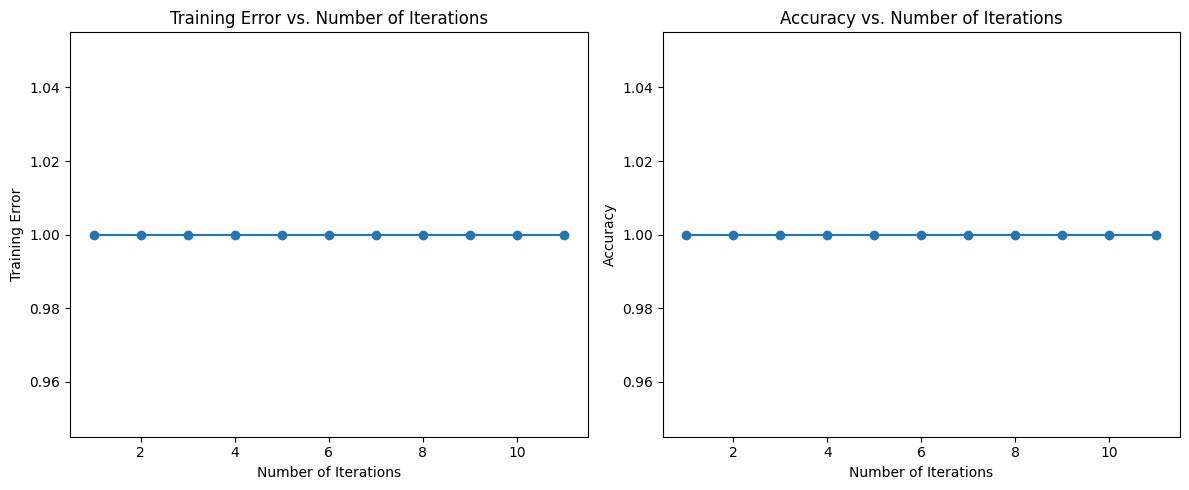

In [ ]:

import numpy as np
import matplotlib.pyplot as plt

n = 100

mean1 = [2, 2]
cov1 = [[1, 0.5], [0.5, 1]]
mean2 = [-2, -2]
cov2 = [[1, -0.5], [-0.5, 1]]

class1_points = np.random.multivariate_normal(mean1, cov1, n)

class2_points = np.random.multivariate_normal(mean2, cov2, n)

# Combine the points and labels
X = np.vstack((class1_points, class2_points))
y = np.hstack((np.ones(n), -np.ones(n)))

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=11):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((self.n_iterations, n_features))
        self.biases = np.zeros(self.n_iterations)
        self.errors = []
        self.accuracies = []

        for i in range(self.n_iterations):
            error = 0
            for j in range(n_samples):
                if y[j] * (np.dot(X[j], self.weights[i]) + self.biases[i]) <= 0:
                    self.weights[i] += self.learning_rate * y[j] * X[j]
                    self.biases[i] += self.learning_rate * y[j]
                    error += 1
            self.errors.append(error)
            self.accuracies.append(self.calculate_accuracy(X, y, i))

    def calculate_accuracy(self, X, y, iteration):
        predictions = np.sign(np.dot(X, self.weights[iteration]) + self.biases[iteration])
        return np.mean(predictions == y)

model = Perceptron()

model.fit(X, y)

final_accuracy = model.calculate_accuracy(X, y, model.n_iterations - 1)
print("Final Training Accuracy:", final_accuracy)


for i in range(model.n_iterations - 10, model.n_iterations):
    plt.figure()
    plt.scatter(class1_points[:, 0], class1_points[:, 1], color='blue', label='Class 1')
    plt.scatter(class2_points[:, 0], class2_points[:, 1], color='red', label='Class 2')

    w = model.weights[i]
    b = model.biases[i]
    x_plot = np.linspace(-5, 5, 100)
    y_plot = (-w[0] * x_plot - b) / w[1]
    plt.plot(x_plot, y_plot, linestyle='--', color='black', label=f'Iteration {i+1}')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(f'Separating Line for Iteration {i+1}')
    plt.legend()
    plt.show()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, model.n_iterations + 1), model.errors, marker='o', linestyle='-')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Error')
plt.title('Training Error vs. Number of Iterations')

plt.subplot(1, 2, 2)
plt.plot(range(1, model.n_iterations + 1), model.accuracies, marker='o', linestyle='-')
plt.xlabel('Number of Iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Number of Iterations')

plt.tight_layout()
plt.show()



2. Consider the IRIS dataset with any two classes. Write a Python code to design a **Perceptron Algorithm** and plot the **training error v/s number of iterations.**

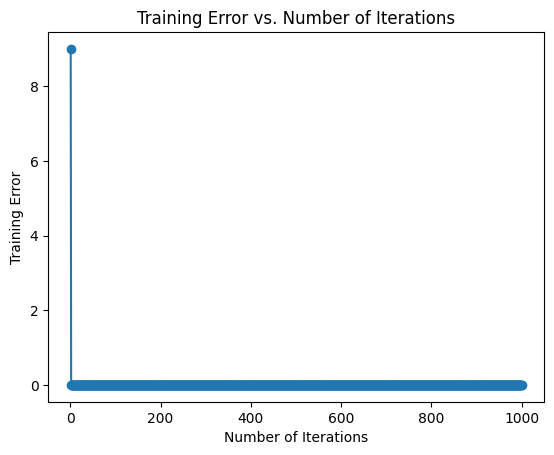

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

iris_df = sns.load_dataset("iris")

classes_to_keep = ['setosa', 'versicolor']
iris_df_filtered = iris_df[iris_df['species'].isin(classes_to_keep)]

X = iris_df_filtered.drop(columns=['species']).values
y = iris_df_filtered['species'].map({'setosa': -1, 'versicolor': 1}).values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

class Perceptron:
    def __init__(self, learning_rate=0.01, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.errors = []

        for _ in range(self.n_iterations):
            error = 0
            for i in range(n_samples):
                if y[i] * (np.dot(X[i], self.weights) + self.bias) <= 0:
                    self.weights += self.learning_rate * y[i] * X[i]
                    self.bias += self.learning_rate * y[i]
                    error += 1
            self.errors.append(error)

    def predict(self, X):
        return np.sign(np.dot(X, self.weights) + self.bias)

model = Perceptron()

model.fit(X_train, y_train)

plt.plot(range(1, model.n_iterations + 1), model.errors, marker='o', linestyle='-')
plt.xlabel('Number of Iterations')
plt.ylabel('Training Error')
plt.title('Training Error vs. Number of Iterations')
plt.show()



    sepal_length  sepal_width  petal_length  petal_width     species
0            5.1          3.5           1.4          0.2      setosa
1            4.9          3.0           1.4          0.2      setosa
2            4.7          3.2           1.3          0.2      setosa
3            4.6          3.1           1.5          0.2      setosa
4            5.0          3.6           1.4          0.2      setosa
..           ...          ...           ...          ...         ...
95           5.7          3.0           4.2          1.2  versicolor
96           5.7          2.9           4.2          1.3  versicolor
97           6.2          2.9           4.3          1.3  versicolor
98           5.1          2.5           3.0          1.1  versicolor
99           5.7          2.8           4.1          1.3  versicolor

[100 rows x 5 columns]


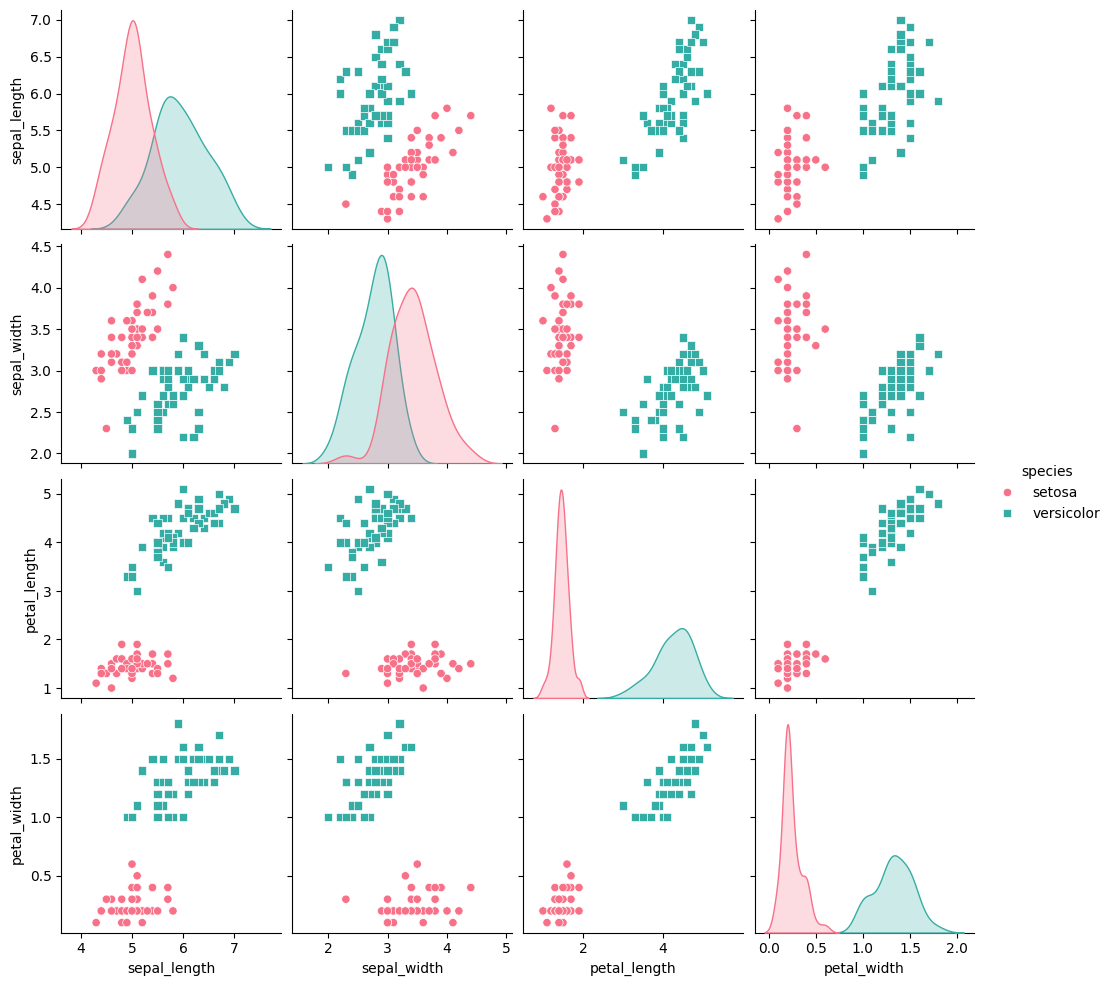

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris_df = sns.load_dataset("iris")

classes_to_keep = ['setosa', 'versicolor']
iris_df_filtered = iris_df[iris_df['species'].isin(classes_to_keep)]
print(iris_df_filtered)
sns.pairplot(iris_df_filtered, hue="species", palette="husl", markers=["o", "s"])
plt.show()
